In [1]:
import pandas as pd
import numpy as np

import torch
import torch.nn as nn

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('data/Moore/moore.csv', sep='\t', header=None).iloc[:, [1,2]]
print(df.shape)
df.head()

(102, 2)


,1,2
0,"2,300",1971
1,"3,500",1972
2,"4,500",1974
3,"4,100",1974
4,"5,000",1974


In [3]:
for index, row in df.iterrows():
    idx = row[1].find('[');
    if idx != -1 :
        row[1] = row[1][:idx]
    idx = row[2].find('[');
    if idx != -1 :
        row[2] = row[2][:idx]
    df.iloc[index] = row

In [4]:
df[1] = df[1].apply(lambda x : x.replace(',', ''))
df = df[df[1].str.isnumeric() & df[2].str.isnumeric()]

In [5]:
dataset = df.values

X = dataset[:, 1].reshape(-1, 1).astype(np.float32)
Y = dataset[:, 0].reshape(-1 ,1).astype(np.float32)

print('X shape: {}'.format(X.shape))
print('Y shape: {}'.format(Y.shape))

X shape: (100, 1)
Y shape: (100, 1)


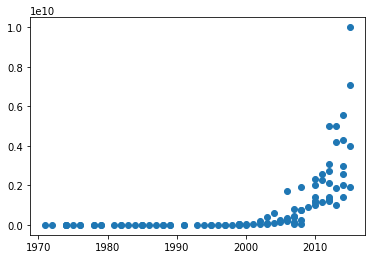

In [6]:
plt.scatter(X, Y)

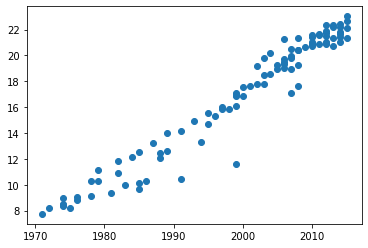

In [7]:
Y = np.log(Y)

plt.scatter(X, Y)

In [8]:
x_mean = X.mean()
print('X mean: {}'.format(x_mean))
x_sd = X.std()
print('X standard deviation: {}'.format(x_sd))
y_mean = Y.mean()
print('Y mean: {}'.format(y_mean))
y_sd = Y.std()
print('Y standard deviation: {}'.format(y_sd))

X mean: 1999.3499755859375
X standard deviation: 13.055553436279297
Y mean: 16.869443893432617
Y standard deviation: 4.709517478942871


In [9]:
Y = (Y-y_mean)/y_sd
X = (X-x_mean)/x_sd

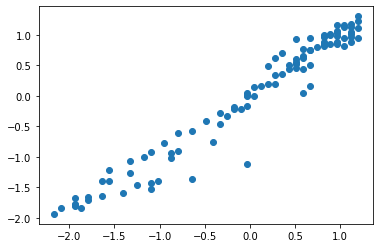

In [10]:
plt.scatter(X, Y)

In [11]:
inp = torch.from_numpy(X)
target = torch.from_numpy(Y)

In [12]:
model = nn.Linear(1, 1)

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.05)


In [13]:
losses = []

for epoch in range(1,100):
    optimizer.zero_grad()
    
    output = model(inp)
    
    loss = criterion(output, target)
    losses.append(loss.item())
    
    loss.backward()
    
    optimizer.step()    

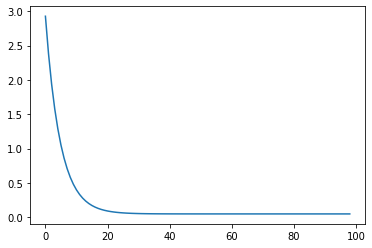

In [14]:
plt.plot(losses)

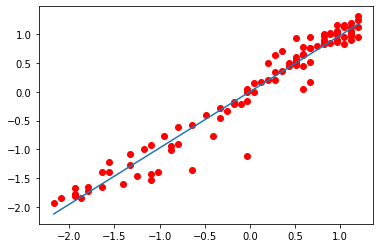

In [15]:
predicted = model(inp).detach().numpy()

plt.plot(X, predicted)
plt.scatter(X, Y, c='r')

In [16]:
weight = model.weight.data.numpy()
bias = model.bias.data.numpy()

print('weight: {}'.format(weight))
print('bias: {}'.format(bias))


weight: [[0.97584105]]
bias: [-1.4133424e-05]


$$ C = C_0r^t $$
$$ \log{C} = \log{r}*t + \log{C_0} $$
$$ y' = a*x' + b $$
$$ y' = \frac{y-\mu_y}{\sigma_y} \qquad x' = \frac{x-\mu_x}{\sigma_x} $$
$$ \frac{y-\mu_y}{\sigma_y} = a * \frac{x-\mu_x}{\sigma_x} + b $$
$$ y = a * \frac{x*\sigma_y-\mu_x*\sigma_y}{\sigma_x} + b*\sigma_y + \mu_y$$
$$ y = a * \frac{\sigma_y}{\sigma_x}*x-\frac{\mu_x*\sigma_y}{\sigma_x} + b*\sigma_y + \mu_y$$

$$ y = \log{C} $$
$$ \log{r} = a * \frac{\sigma_y}{\sigma_x} $$
$$ r = e^{a\frac{\sigma_y}{\sigma_x}} $$
where *a* is our **weight**

In [17]:
a = weight[0,0]*y_sd/x_sd
r = np.exp(a)
print('r: {}'.format(r))

r: 1.4219287633895874


I've used already given formula to get the actual trend

// TODO calculate the trend by hands

In [18]:
print('The cost doubles every {:.3f} years'.format(np.log(2)/a))

The cost doubles every 1.969 years
